In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import implementChannelLimit, fromHB5Table1, readHEPDataCsv
from Higgs import bounds as HB
from Higgs import predictions as HP
import Higgs
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `ggH > Z gam`  [2309.04364](https://arxiv.org/abs/2309.04364)

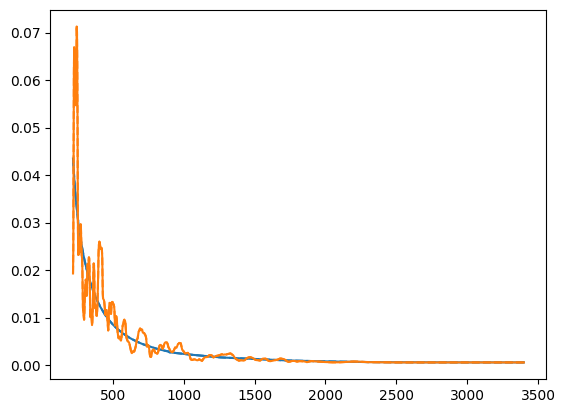

Looks good. Saving this to ggH_LHC13_ATLAS_140.json


/tmp/ipykernel_521803/3581890731.py:68: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  expCc.collections[0].set_label("expRatio = 1")
/tmp/ipykernel_521803/3581890731.py:69: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  obsCc.collections[0].set_label("obsRatio = 1")


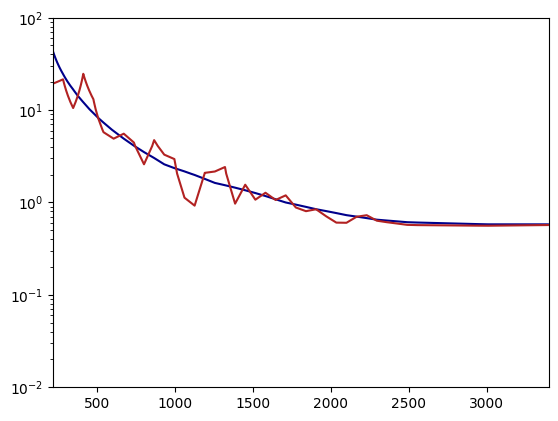

In [24]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins2695554/Table%204/1/csv",
)
df = dfs[0].rename(columns={r'$m_{X}$ [GeV]' : 'm', 'Cross section upper limit at 95% CL [fb]': 'obs'})


dfexp = dfs[1]['Cross section upper limit at 95% CL [fb]']

from scipy import interpolate

lstm = []
lstexp = []
for i in range(len(dfexp)):
    if dfexp[i] >= 0:
        lstm.append(df['m'][i])
        lstexp.append(dfexp[i])

interpr_exp = interpolate.interp1d(lstm, lstexp)

df['exp'] = interpr_exp(df['m'])
df.exp *= 1e-3
df.obs *= 1e-3
limitFile = implementChannelLimit(
    2695554,
    {"channels": [["ggH", "Zgam"]]},
    "Fig. 4",
    df,
    massResolution=resolution.Zgam["default"],
)
lim = HB.Limit(limitFile)

fig, ax = validateChannelLimit(lim)


## `ggH > Z gam` high mass [1805.01908](https://arxiv.org/abs/1805.01908)

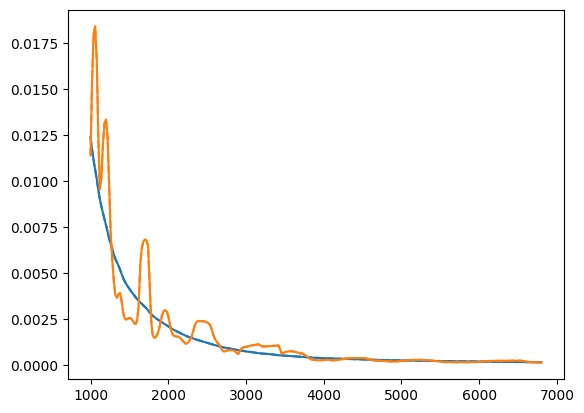

Looks good. Saving this to ggH_highM_LHC13_ATLAS_36.json


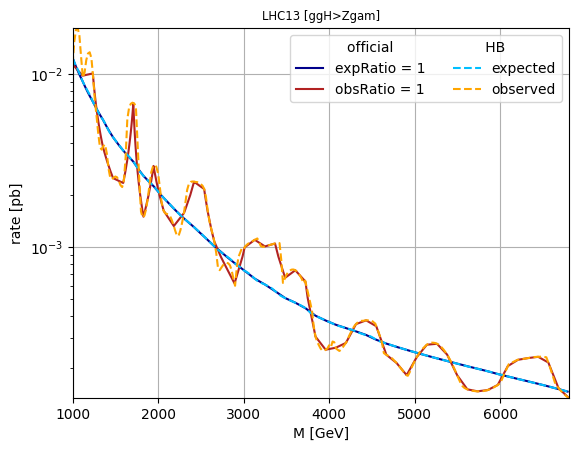

In [2]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1672010/Table%2014/1/csv",
)


df = dfs[1].rename(
    columns={"Mass [GeV]": "m", "Cross section upper limit at 95% CL [fb]": "obs"}
)

df["exp"] = dfs[0]["Cross section upper limit at 95% CL [fb]"]

df.exp *= 1e-3
df.obs *= 1e-3


limitFile = implementChannelLimit(
    1672010,
    {"channels": [["ggH", "Zgam"]]},
    "Fig. 8a",
    df,
    prefix="ggH_highM",
    massResolution=resolution.Zgam["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `ggH > Z gam` [1708.00212](https://arxiv.org/abs/1708.00212)

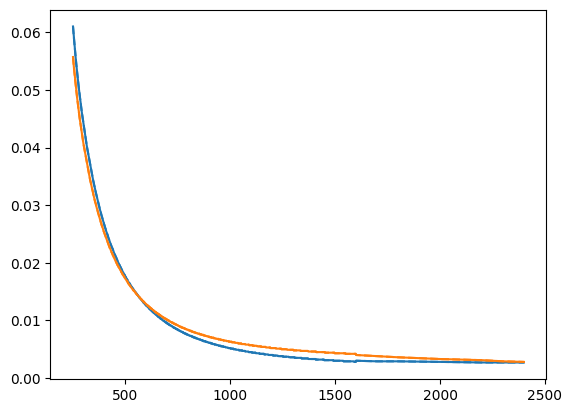

Looks good. Saving this to ggH_LHC13_ATLAS_36.json


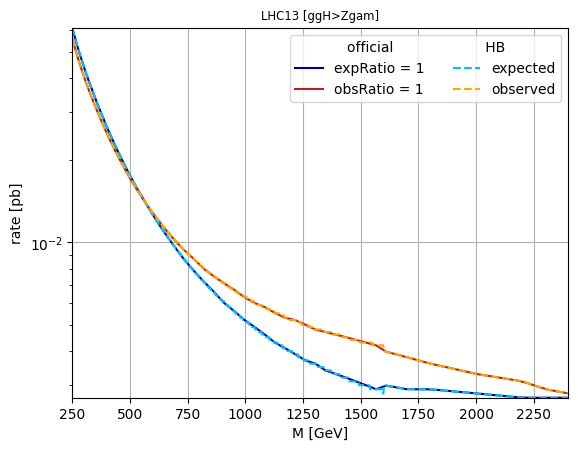

In [3]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1613896/Table%201/1/csv",
    skip=1,
)
df = dfs[-1].rename(columns={"M(X) [GEV]": "m", "Observed [fb]": "obs"})
df["exp"] = dfs[0]["Expected [fb]"]

df.exp *= 1e-3
df.obs *= 1e-3

limitFile = implementChannelLimit(
    "1708.00212",
    {"channels": [["ggH", "Zgam"]]},
    "https://doi.org/10.17182/hepdata.78906.v1/t1",
    df,
    massResolution={
        "absolute": 1,
        "relative": 0.01,
    },  # approx fit to the values on p. 13
    idSuffix=1,
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `h125 -> Z gam` [1708.00212](https://arxiv.org/abs/1708.00212)

In [4]:
df = pd.DataFrame({"m": [125.09], "obs": 6.6, "exp": 4.4})
limitFile = implementChannelLimit(
    "1708.00212",
    {"channels": [[p, "Zgam"] for p in ["ggH", "vbfH", "HW", "HZ"]]},
    "p. 23",
    df,
    massResolution={
        "absolute": 2,
        "relative": 0,
    },
    idSuffix=2,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125.09)
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings, reference="SMHiggsInterp")
res = lim.apply(pred)
assert np.isclose(res[0].obsRatio(), 1 / 6.6)
assert np.isclose(res[0].expRatio(), 1 / 4.4)


Looks good. Saving this to comb_LHC13_ATLAS_36.json


# ATLAS 8TeV LHC

## `H > Z gam` SM-Higgs combination [1402.3051](https://arxiv.org/abs/1402.3051)

In [5]:
df = fromHB5Table1("3051_Atlas_H-Zga_24.8fb-1", "ATLAS")
limitFile = implementChannelLimit(
    "1402.3051",
    {"channels": [[p, "Zgam"] for p in ["H", "vbfH", "HZ", "HW", "Htt"]]},
    "Fig. 3",
    df,
    massResolution=resolution.Zgam["default"],
    luminosity=4.5 + 20.3,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


Multiple different luminosity values: [4.5, 20.3] using 4.5 unless you set it manually


Looks good. Saving this to comb_LHC8_ATLAS_25.json
using effective coupling input for SM-normalized limit
